## EDA for Arabidopsis infected by fungi
#### Comparison of GO Class Distribution of Expressed and Repressed Genes 

Made by: Cynthia Soto <br>
Fecha: September 20, 2021 <br>
Lastest md: October 22, 2021  <br>

######################################################################
####                          CELLULAR COMPONENT (Gene-Ontology)
######################################################################

#### Material:
1. Datafiles with the coexpression values (matrix healthy and infected).
2. Bulk TAIR file (Recovered on July 2021)
3. Main libraries: pandas, numpy and matplotlib

#### Methodology:
1. Each coexpression matrix is filtered according to the target. Ejm: Get the repressed genes or the expressed genes (a subset).
2. The subset is linked to the annotation bulk-file TAIR (Recovered from TAIR on July 2021)
3. Several visualizations are built to find the more appropriate for reflect the research context. 

#### Key elements:
1. Merge the coexpression matrix with the annotation file by a unique field (avoid unexpected results)
2. Identify in the annotation file the field that can be used as filter. Ejm. category.
3. Made use of smarted python functions like group_by, unique, merge, describe, etc. to speed the analysis. But pay attention to the details.  

**Assumptions:** <br>
You have a bulk file with the annotations from your organism <br>
You have coexpression matrices ready for EDA<br>

### FIRST: Basic settings and declaration  of functions

In [59]:
import os 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/meta-data/")
    #print("Current Directory:", os.getcwd())
except OSError:
    print("Can't change the Current Working Directory")    

### Functions

In [60]:
def make_pie_donut_chart(q, lbs, title):
    fig1, ax1 = plt.subplots(figsize=(15,10))
    
    # Labels with percentual and float values
    ax1.pie(q, labels=lbs,autopct=make_autopct2(q), 
             textprops={'fontsize': 16}, startangle=90)              
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.text(0, -.1, title, ha='center', fontsize=24)

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()
    return

In [61]:
def make_autopct2(values):
    
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{v:d}'.format(p=pct,v=val)
    
    return my_autopct

### SECOND: meta-data of genes (GO class and gene locus) is retrieved from the GO annotations bulk file. 

In [62]:
# This is the file get from TAIR (https://www.arabidopsis.org/tools/bulk/go/index.jsp)
df = pd.read_csv("athal_GO_terms.txt",  sep='\t', usecols=[0,3,4,5,6,7,8,9])   #usecols=[0,3,4,5,6,7] 

In [63]:
df.columns
#df.head(3)

Index(['Locus', 'GO term', 'GO ID', 'TAIR internal GO id', 'category',
       'GO Slim(s)', 'Evidence code', 'Reference'],
      dtype='object')

In [64]:
# Select the fields of interest and rename columns for a fashion use 
df.columns = ['locus','GO_term','GO_id','TAIR_id','category','GO_slim','Evidence code','Reference']
print(df.shape)
df.columns

(201479, 8)


Index(['locus', 'GO_term', 'GO_id', 'TAIR_id', 'category', 'GO_slim',
       'Evidence code', 'Reference'],
      dtype='object')

In [65]:
df.head(3)

,locus,GO_term,GO_id,TAIR_id,category,GO_slim,Evidence code,Reference
0,AT1G01010,nucleus,GO:0005634,537.0,comp,nucleus,ISM,AnalysisReference:501780126
1,AT1G01010,"regulation of transcription, DNA-templated",GO:0006355,7461.0,proc,other cellular processes | nucleobase-containing compound metabolic process | other metabolic processes | biosynthetic process,ISS,Publication:1345963|PMID:11118137
2,AT1G01010,DNA-binding transcription factor activity,GO:0003700,4449.0,func,DNA-binding transcription factor activity,ISS,Publication:1345963|PMID:11118137


In [66]:
# chek uniques by category
df.category.unique()

array(['comp', 'proc', 'func', nan], dtype=object)

**Setting the filtering parameter** 

In [67]:
## Available GO categories
GO_cat = 'comp'
# GO_cat = 'func'
# GO_cat = 'proc'

## MATRIX TO ANALYZE
sfile = 'matrix_E_infected.csv'
## TITLE TO BE USED IN PLOTS
title_plot = 'Cellular component'

In [68]:
## Filter df by GO category (proceses and component are removed, just keep funciton category)
is_gene_func = (df['category']== GO_cat)     
df_meta = df[is_gene_func]

In [69]:
# chk size and see for duplicated functions 
df_meta.shape

(88793, 8)

In [70]:
df_meta.head(30)

,locus,GO_term,GO_id,TAIR_id,category,GO_slim,Evidence code,Reference
0,AT1G01010,nucleus,GO:0005634,537.0,comp,nucleus,ISM,AnalysisReference:501780126
4,AT1G01020,mitochondrion,GO:0005739,486.0,comp,mitochondrion,ISM,AnalysisReference:501780126
8,AT1G01020,chloroplast,GO:0009507,175.0,comp,chloroplast,ISM,AnalysisReference:501780126
9,AT1G01020,mitochondrion,GO:0005739,486.0,comp,mitochondrion,ISM,AnalysisReference:501780126
12,AT1G01020,chloroplast,GO:0009507,175.0,comp,chloroplast,ISM,AnalysisReference:501780126
13,AT1G01020,Golgi apparatus,GO:0005794,48.0,comp,Golgi apparatus,IBA,Communication:501741973
16,AT1G01020,endoplasmic reticulum,GO:0005783,268.0,comp,endoplasmic reticulum,IDA,Publication:501719026|PMID:16725371
17,AT1G01020,cortical endoplasmic reticulum,GO:0032541,27968.0,comp,other intracellular components | endoplasmic reticulum | cytoplasm,IBA,Communication:501741973
18,AT1G01020,mitochondrion,GO:0005739,486.0,comp,mitochondrion,ISM,AnalysisReference:501780126
19,AT1G01020,mitochondrion,GO:0005739,486.0,comp,mitochondrion,ISM,AnalysisReference:501780126


In [71]:
# exploring possible filters 
print(len(df_meta.GO_term.unique()))
df_meta.GO_term.unique()

840


array(['nucleus', 'mitochondrion', 'chloroplast', 'Golgi apparatus',
       'endoplasmic reticulum', 'cortical endoplasmic reticulum',
       'nuclear dicing body', 'cytoplasm', 'cytosol', 'nucleoplasm',
       'plasma membrane', 'chloroplast stroma', 'plastid',
       'chloroplast thylakoid membrane', 'chloroplast envelope',
       'cytosolic large ribosomal subunit', 'cytosolic ribosome',
       'membrane', 'extracellular region', 'cellular_component_unknown',
       'cell plate', 'endosome', 'RNA polymerase III complex',
       'SPOTS complex', 'plant-type cell wall', 'extracellular space',
       'U2-type spliceosomal complex', 'peroxisome',
       'chromosome, centromeric region', 'chromatin',
       'cytoplasmic stress granule', 'trans-Golgi network', 'vacuole',
       'plasmodesma', 'Golgi-associated vesicle membrane',
       'lysosomal membrane',
       'integral component of lumenal side of endoplasmic reticulum membrane',
       'integral component of cytoplasmic side of endo

In [72]:
# exploring possible filters 
print(len(df_meta.GO_id.unique()))
df_meta.GO_term.unique()

840


array(['nucleus', 'mitochondrion', 'chloroplast', 'Golgi apparatus',
       'endoplasmic reticulum', 'cortical endoplasmic reticulum',
       'nuclear dicing body', 'cytoplasm', 'cytosol', 'nucleoplasm',
       'plasma membrane', 'chloroplast stroma', 'plastid',
       'chloroplast thylakoid membrane', 'chloroplast envelope',
       'cytosolic large ribosomal subunit', 'cytosolic ribosome',
       'membrane', 'extracellular region', 'cellular_component_unknown',
       'cell plate', 'endosome', 'RNA polymerase III complex',
       'SPOTS complex', 'plant-type cell wall', 'extracellular space',
       'U2-type spliceosomal complex', 'peroxisome',
       'chromosome, centromeric region', 'chromatin',
       'cytoplasmic stress granule', 'trans-Golgi network', 'vacuole',
       'plasmodesma', 'Golgi-associated vesicle membrane',
       'lysosomal membrane',
       'integral component of lumenal side of endoplasmic reticulum membrane',
       'integral component of cytoplasmic side of endo

In [73]:
# exploring possible filters 
print(len(df_meta.GO_term.unique()))
df_meta.GO_id.unique()

840


array(['GO:0005634', 'GO:0005739', 'GO:0009507', 'GO:0005794',
       'GO:0005783', 'GO:0032541', 'GO:0010445', 'GO:0005737',
       'GO:0005829', 'GO:0005654', 'GO:0005886', 'GO:0009570',
       'GO:0009536', 'GO:0009535', 'GO:0009941', 'GO:0022625',
       'GO:0022626', 'GO:0016020', 'GO:0005576', 'GO:0005575',
       'GO:0009504', 'GO:0005768', 'GO:0005666', 'GO:0035339',
       'GO:0009505', 'GO:0005615', 'GO:0005684', 'GO:0005777',
       'GO:0000775', 'GO:0000785', 'GO:0010494', 'GO:0005802',
       'GO:0005773', 'GO:0009506', 'GO:0030660', 'GO:0005765',
       'GO:0071556', 'GO:0071458', 'GO:0015629', 'GO:0005730',
       'GO:0031969', 'GO:0005778', 'GO:0005779', 'GO:0005618',
       'GO:0048046', 'GO:0031012', 'GO:0043529', 'GO:0036266',
       'GO:0005874', 'GO:0005871', 'GO:0032588', 'GO:0030141',
       'GO:0042025', 'GO:0030015', 'GO:0000932', 'GO:0008180',
       'GO:0000139', 'GO:0035145', 'GO:0016607', 'GO:0005789',
       'GO:0005788', 'GO:0016021', 'GO:0009707', 'GO:00

In [74]:
# chk how many locus extists in the df
print(len(df_meta.locus.unique()))
df_meta.locus.unique()

26061


array(['AT1G01010', 'AT1G01020', 'AT1G01030', ..., 'ATMG01370',
       'ATMG01400', 'ATMG01410'], dtype=object)

In [75]:
# arbitrary remove duplicates and just keep the first locus ocurrence to have a reduced df to attach to the wgcna dendogram
df_unique = df_meta.drop_duplicates(subset = ["locus"])
# gene variants may be lost, need to find a better way to filter  ....

In [76]:
print(len(df_unique))
#df_unique.rename(columns={'locus': 'Genes'}, inplace=True)
df_gene_func = df_unique.rename({'locus':'Genes'}, axis='columns')

26061


In [77]:
GO_cat
%pwd

'/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/meta-data'

In [78]:
# df_gene_func.to_csv('../results-data/genes_arranged_byGO_'+ GO_cat +'.csv', header=True, sep='\t', index=False)

**Approach restrictions:**
1. Only GO classes with a frequency> Q2 (second cuartil) were considered.
2. Some genes have multiple annotations, the first of each locus was taken as a reference to create the graphs.

### Load expression matrix to merge the gene functions asociated
### Arabidopsis INFECTED dataset

In [79]:
df_infected_MatE = pd.read_csv("../results-data/matrices_de_expresion/" + sfile, sep='\t') 

In [80]:
print(df_gene_func.shape)
print(df_infected_MatE.shape)

(26061, 8)
(20274, 15)


In [81]:
df_infected_MatE_GOFunc = df_infected_MatE.merge(df_gene_func,on=['Genes'],how='left')
df_infected_MatE_GOFunc.shape

(20274, 22)

### Plot categorical gene function in the raw matrix (infected)

In [82]:
#df_infected_MatE_GOFunc
#df_plt_GOSlim = df_infected_MatE_GOFunc[['Genes','GO_slim']]   # es muy larga la cadena de descripción -- complica la graficación
df_plt_GOSlim = df_infected_MatE_GOFunc[['Genes','GO_id']]
df_plt_GOSlim

,Genes,GO_id
0,AT1G01020,GO:0005739
1,AT1G01030,GO:0005634
2,AT1G01040,GO:0005634
3,AT1G01050,GO:0005634
4,AT1G01060,GO:0005634
...,...,...
20269,ATMG01350,GO:0005739
20270,ATMG01360,GO:0005751
20271,ATMG01370,GO:0005739
20272,ATMG01400,GO:0005739


In [83]:
# count genes by class
#df_tmp = df_plt_GOSlim.groupby(['GO_slim']).count()
df_tmp = df_plt_GOSlim.groupby(['GO_id']).count()
print(len(df_tmp))
df_tmp.tail(8)

486


,Genes
GO_id,
GO:1990072,1
GO:1990124,1
GO:1990246,2
GO:1990316,1
GO:1990726,2
GO:1990745,1
GO:1990879,1
GO:1990904,8


**reset idx, sort values, get stats and filter the range desired for visualizations**

In [84]:
#df_tmp.reset_index(level='GO_slim', col_level=1, inplace=True)
df_tmp.reset_index(level='GO_id', col_level=1, inplace=True)
df_tmp

,GO_id,Genes
0,GO:0000110,1
1,GO:0000118,4
2,GO:0000124,2
3,GO:0000127,3
4,GO:0000137,10
...,...,...
481,GO:1990316,1
482,GO:1990726,2
483,GO:1990745,1
484,GO:1990879,1


In [85]:
df_tmp.describe()

,Genes
count,486.000000
mean,39.703704
std,306.159878
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5520.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24461d3970>]],
      dtype=object)

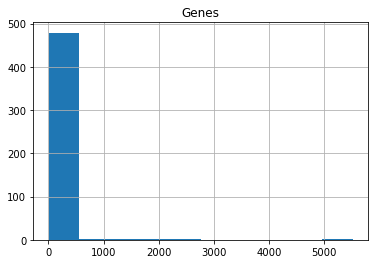

In [86]:
df_tmp.hist()

In [87]:
df_tmp.quantile(0.5)
#df_tmp['rank'] = df_tmp['Genes'].rank()

Genes    2.0
Name: 0.5, dtype: float64

In [88]:
df_tmp.head()

,GO_id,Genes
0,GO:0000110,1
1,GO:0000118,4
2,GO:0000124,2
3,GO:0000127,3
4,GO:0000137,10


In [89]:
#df_tmp.sort_values(['Genes'])
## Filter df by GO category. Ejm: function (proceses and component are removed, just keep funciton category)
is_gene_grater1 = df_tmp['Genes'] >= 2
df_tmp_infected = df_tmp[is_gene_grater1]
print('Records:'+str(len(df_tmp_infected)))
df_tmp_infected.head(5)

Records:299


,GO_id,Genes
1,GO:0000118,4
2,GO:0000124,2
3,GO:0000127,3
4,GO:0000137,10
5,GO:0000138,15


In [90]:
df_tmp_infected = df_tmp_infected.sort_values(['Genes'], ascending=False)
#goslim = df_tmp_infected['GO_slim'].tolist() -----this field is to large to plot
data = df_tmp_infected['Genes'].to_list()
#goslim = df_tmp_infected['GO_slim'].tolist()
goslim = df_tmp_infected['GO_id'].tolist()
len(goslim)

299

In [91]:
#make_pie_donut_chart
# goslim_10first = goslim[0:10]
# goslim_10first
#keep first 10 terms and set the remaining labels to zero to clear the plot 
goslim = [GO if i < 10 else '' for i, GO in enumerate(goslim)]
goslim

['GO:0005634',
 'GO:0009507',
 'GO:0005739',
 'GO:0005737',
 'GO:0005886',
 'GO:0005576',
 'GO:0005829',
 'GO:0005575',
 'GO:0005794',
 'GO:0005783',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


In [92]:
make_pie_donut_chart

<function __main__.make_pie_donut_chart(q, lbs, title)>

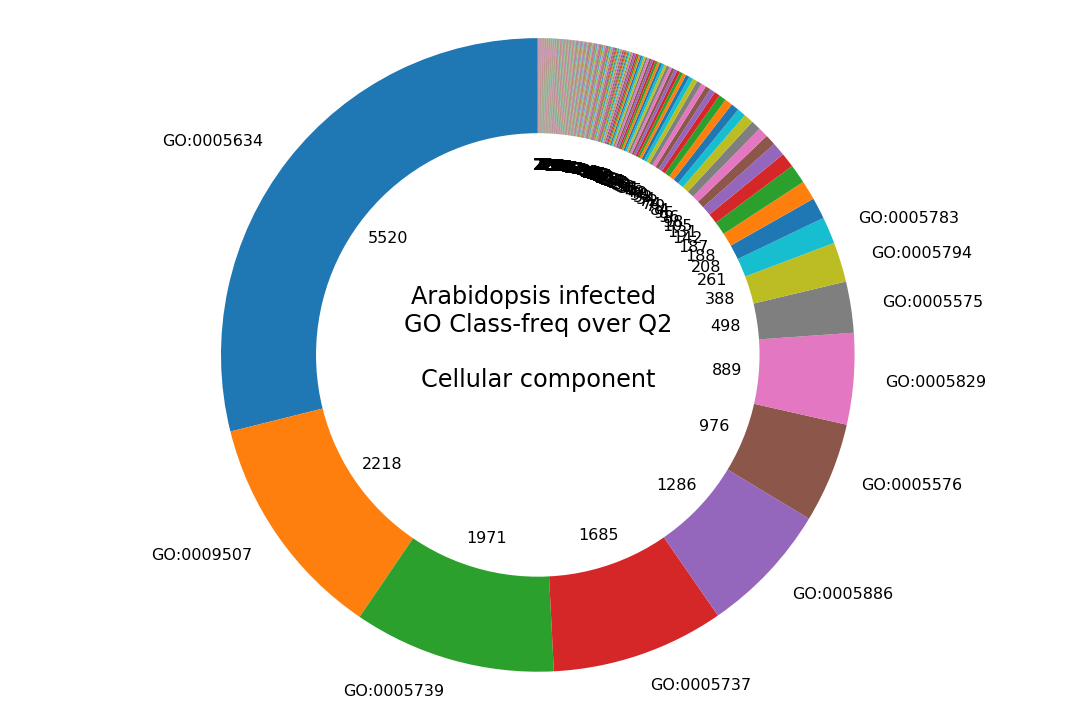

In [93]:
# plot a pie chart by GO Category
make_pie_donut_chart(data, goslim, 'Arabidopsis infected \nGO Class-freq over Q2\n\n'+ title_plot)

In [94]:
# Get the first 10
df_TopGO_terms =  df_tmp_infected.head(10)
print(title_plot)
print(sfile)
df_TopGO_terms
#lst_GO_terms_selected = df_TopGO_terms['GO_id'].tolist()
#lst_GO_terms_selected

Cellular component
matrix_E_infected.csv


,GO_id,Genes
74,GO:0005634,5520
205,GO:0009507,2218
109,GO:0005739,1971
108,GO:0005737,1685
177,GO:0005886,1286
70,GO:0005576,976
153,GO:0005829,889
69,GO:0005575,498
143,GO:0005794,388
137,GO:0005783,261


In [95]:
# send the GO_id(s) to a list to get the term description
lst_GO = df_TopGO_terms['GO_id'].to_list()
lst_GO

['GO:0005634',
 'GO:0009507',
 'GO:0005739',
 'GO:0005737',
 'GO:0005886',
 'GO:0005576',
 'GO:0005829',
 'GO:0005575',
 'GO:0005794',
 'GO:0005783']

In [96]:
## De este archivo se obtiene la descripcion de los GO Terminos
#df_gene_func.head(3)

**Filter df by molecular function (proceses and component are removed, just keep funciton category)**

In [97]:
#pd.set_option('display.max_colwidth', None)   ##use with GO_term
df_10TopGO_desc = df_gene_func[df_gene_func['GO_id']=='GO:0005783']
df_10TopGO_desc.head(1)

,Genes,GO_term,GO_id,TAIR_id,category,GO_slim,Evidence code,Reference
166,AT1G01120,endoplasmic reticulum,GO:0005783,268.0,comp,endoplasmic reticulum,IDA,Publication:501724806|PMID:18465198


In [98]:
# OJO, the sort order is not equal to the list provided
df_10TopGO_desc = df_gene_func[df_gene_func.GO_id.isin(lst_GO)]
df_10TopGO_desc.GO_term.unique()

array(['nucleus', 'mitochondrion', 'plasma membrane',
       'endoplasmic reticulum', 'cytoplasm', 'cellular_component_unknown',
       'chloroplast', 'Golgi apparatus', 'cytosol',
       'extracellular region'], dtype=object)

### Load expression matrix to merge the gene functions asociated
### Arabidopsis HEALTHY dataset

In [99]:
## FILE TO ANALYZE
sfile = 'matrix_D_healthy.csv'

In [100]:
# LOAD FILE
df_healthy_MatD = pd.read_csv("../results-data/matrices_de_expresion/" + sfile,  sep='\t') 

In [101]:
print(df_gene_func.shape)
print(df_healthy_MatD.shape)

(26061, 8)
(19792, 9)


In [102]:
df_healthy_MatD_GO_Category = df_healthy_MatD.merge(df_gene_func,on=['Genes'],how='left')
df_healthy_MatD_GO_Category.shape

(19792, 16)

### Plot categorical gene function in the raw matrix (infected)

In [103]:
#df_infected_MatE_GOFunc
df_plt_GOSlim = df_healthy_MatD_GO_Category[['Genes','GO_id']]
df_plt_GOSlim.head(3)

,Genes,GO_id
0,AT1G01020,GO:0005739
1,AT1G01030,GO:0005634
2,AT1G01040,GO:0005634


In [104]:
df_tmp = df_plt_GOSlim.groupby(['GO_id']).count()
print(len(df_tmp))
df_tmp.tail(8)
df_tmp.reset_index(level='GO_id', col_level=1, inplace=True)
df_tmp.head(3)

477


,GO_id,Genes
0,GO:0000110,1
1,GO:0000118,4
2,GO:0000124,2


In [105]:
df_tmp.describe()

,Genes
count,477.000000
mean,39.515723
std,302.060185
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5393.000000


In [106]:
df_tmp.quantile(0.5)
#df_tmp['rank'] = df_tmp['Genes'].rank()

Genes    2.0
Name: 0.5, dtype: float64

In [107]:
#df_tmp.sort_values(['Genes'])
## Filter df by GO category. Ejm: function (proceses and component are removed, just keep funciton category)
is_gene_grater1 = df_tmp['Genes'] >= 2
df_tmp_healthy = df_tmp[is_gene_grater1]
print('Records:'+str(len(df_tmp_healthy)))
df_tmp_healthy.head(5)

Records:295


,GO_id,Genes
1,GO:0000118,4
2,GO:0000124,2
3,GO:0000127,3
4,GO:0000137,10
5,GO:0000138,15


In [108]:
df_tmp_healthy = df_tmp_healthy.sort_values(['Genes'], ascending=False)
#goslim = df_tmp_infected['GO_slim'].tolist() -----this field is to large to plot
data2 = df_tmp_healthy['Genes'].to_list()
#goslim = df_tmp_healthy['GO_slim'].tolist()
goslim = df_tmp_healthy['GO_id'].tolist()
len(goslim)

295

In [109]:
#data2 = df_tmp_healthy['Genes'].to_list()
#goslim2 = df_tmp_healthy['GO_id'].tolist()

#make_pie_donut_chart
# goslim_10first = goslim[0:10]
# goslim_10first
#keep first 10 terms and set the remaining labels to zero to clear the plot 
goslim = [GO if i < 10 else '' for i, GO in enumerate(goslim)]
goslim

['GO:0005634',
 'GO:0009507',
 'GO:0005739',
 'GO:0005737',
 'GO:0005886',
 'GO:0005576',
 'GO:0005829',
 'GO:0005575',
 'GO:0005794',
 'GO:0005783',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


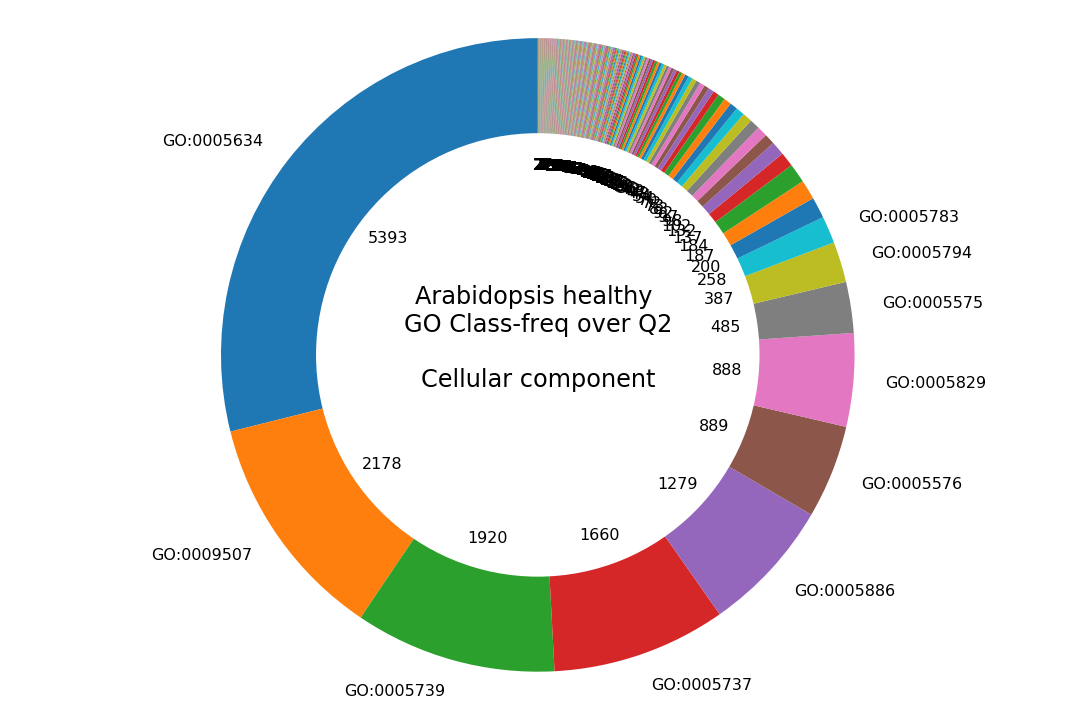

In [110]:
# plot a pie chart by GO Category
make_pie_donut_chart(data2, goslim, 'Arabidopsis healthy \nGO Class-freq over Q2\n\n'+ title_plot)
#make_pie_donut_chart(data2, goslim, "Arabidopsis healthy \nGO "+ title_plot +"\nGenes over Q2")

In [111]:
df_TopGO_terms =  df_tmp_healthy.head(10)
df_TopGO_terms

,GO_id,Genes
73,GO:0005634,5393
203,GO:0009507,2178
107,GO:0005739,1920
106,GO:0005737,1660
175,GO:0005886,1279
69,GO:0005576,889
151,GO:0005829,888
68,GO:0005575,485
141,GO:0005794,387
135,GO:0005783,258


In [112]:
#df_gene_func.head(3)

In [113]:
## Filter df by molecular component (proceses and component are removed, just keep funciton category)
pd.set_option('display.max_colwidth', None)
df_10TopGO_desc = df_gene_func[df_gene_func['GO_id']=='GO:0005634']
df_10TopGO_desc.head(3)

,Genes,GO_term,GO_id,TAIR_id,category,GO_slim,Evidence code,Reference
0,AT1G01010,nucleus,GO:0005634,537.0,comp,nucleus,ISM,AnalysisReference:501780126
25,AT1G01030,nucleus,GO:0005634,537.0,comp,nucleus,ISM,AnalysisReference:501780126
29,AT1G01040,nucleus,GO:0005634,537.0,comp,nucleus,IBA,Communication:501741973


### Integrate the two resulting subsets to plot as comparison

In [114]:
df_infected = df_tmp_infected.rename({'Genes':'Genes_Inf'}, axis='columns')
print(len(df_infected), 'GO classes in the'+ title_plot +' category in the infected dataset')
df_healthy = df_tmp_healthy.rename({'Genes':'Genes_Healthy'}, axis='columns')
print(len(df_healthy), 'GO classes in the '+ title_plot +' category in the healthy dataset')

299 GO classes in theCellular component category in the infected dataset
295 GO classes in the Cellular component category in the healthy dataset


In [117]:
# merge both datasets based on the locus of the infected dataset
df_plt_comp = df_infected.merge(df_healthy,on=['GO_id'],how='outer')
df_plt_comp.shape

(299, 3)

In [118]:
print(len(df_plt_comp))
df_plt_comp

299


,GO_id,Genes_Inf,Genes_Healthy
0,GO:0005634,5520,5393.0
1,GO:0009507,2218,2178.0
2,GO:0005739,1971,1920.0
3,GO:0005737,1685,1660.0
4,GO:0005886,1286,1279.0
...,...,...,...
294,GO:0031932,2,2.0
295,GO:0005953,2,2.0
296,GO:0005663,2,2.0
297,GO:0008250,2,2.0


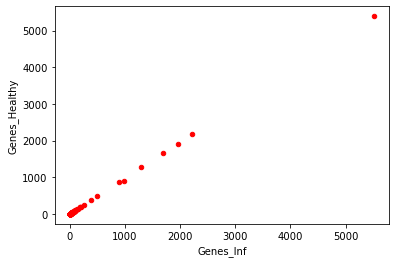

In [119]:
# a scatter plot comparing num_children and num_pets
df_plt_comp.plot(kind='scatter',x='Genes_Inf',y='Genes_Healthy',color='red')
plt.show()

In [120]:
df_plt_comp.fillna(0)
df_plt_comp.sort_values(['Genes_Inf'])
df_plt_comp

,GO_id,Genes_Inf,Genes_Healthy
0,GO:0005634,5520,5393.0
1,GO:0009507,2218,2178.0
2,GO:0005739,1971,1920.0
3,GO:0005737,1685,1660.0
4,GO:0005886,1286,1279.0
...,...,...,...
294,GO:0031932,2,2.0
295,GO:0005953,2,2.0
296,GO:0005663,2,2.0
297,GO:0008250,2,2.0


In [121]:
# df_plt_comp.iloc[[13,26,27]]

### Get the genes with missing data
Here we are infering that this genes (On/Off) means something

In [122]:
#filter data with missing data
df_plt_comp.columns[df_plt_comp.isna().any()]
df_plt_comp.isna().sum()

GO_id            0
Genes_Inf        0
Genes_Healthy    4
dtype: int64

In [123]:
#get the row index of the missing values
lst_nan = df_plt_comp.index[df_plt_comp.isna().any(axis=1)].to_list()
lst_nan[:5]

[212, 218, 244, 275]

In [124]:
# use the method query to get the rows with this NaN values
df_GO_Differences = df_plt_comp.iloc[lst_nan]
df_GO_Differences

,GO_id,Genes_Inf,Genes_Healthy
212,GO:0009897,2,NaN
218,GO:0005788,2,NaN
244,GO:0071944,2,NaN
275,GO:0031357,2,NaN


In [125]:
#get the x largest row indexes with NaN values 
#df_plt_comp.isna().sum(axis=1).nlargest(3)

In [126]:
# ## Remove rows with missing data
# index_with_nan = df_plt_comp.index[df_plt_comp.isna().any(axis=1)]
# index_with_nan.shape
# df_plt_comp.drop(index_with_nan,0, inplace=True)
# df_plt_comp.shape

In [127]:
labels = df_GO_Differences['GO_id'].tolist()
len_inf = len(labels)
print(len_inf, 'GO terms exclusive expressed in the infected dataset')
labels[:5]
#Name_list = df["Name"].tolist()

4 GO terms exclusive between datasets


['GO:0009897', 'GO:0005788', 'GO:0071944', 'GO:0031357']

In [128]:
print(plt.style.available)

['seaborn-whitegrid', 'seaborn-poster', 'tableau-colorblind10', 'seaborn-pastel', 'seaborn-white', 'seaborn-talk', 'classic', 'seaborn-dark-palette', 'seaborn-notebook', 'seaborn-deep', 'seaborn-darkgrid', 'bmh', '_classic_test', 'fast', 'seaborn', 'fivethirtyeight', 'seaborn-dark', 'seaborn-bright', 'seaborn-muted', 'grayscale', 'dark_background', 'Solarize_Light2', 'seaborn-ticks', 'ggplot', 'seaborn-colorblind', 'seaborn-paper']


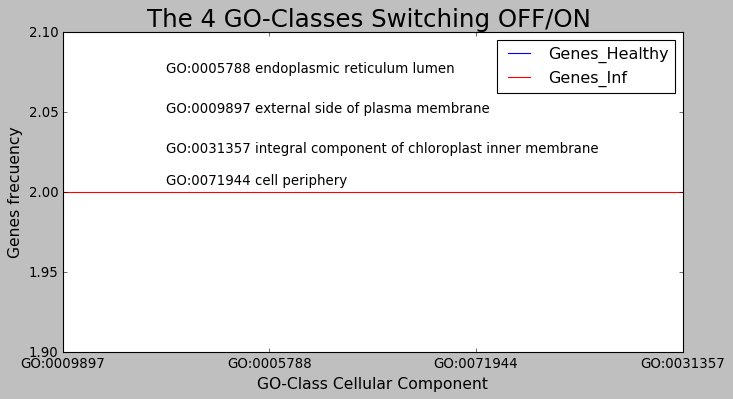

In [139]:
# gca stands for 'get current axis'
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('classic')

ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()

df_GO_Differences.plot(kind='line',x='GO_id',y='Genes_Healthy', color='blue', ax=ax)
df_GO_Differences.plot(kind='line',x='GO_id',y='Genes_Inf', color='red', ax=ax)

# Used to label the GO terms in the molecular component category
plt.text(0.5,2.075,'GO:0005788 endoplasmic reticulum lumen', fontsize=12)
plt.text(0.5,2.050,'GO:0009897 external side of plasma membrane', fontsize=12)
plt.text(0.5,2.025,'GO:0031357 integral component of chloroplast inner membrane', fontsize=12)
plt.text(0.5,2.005,'GO:0071944 cell periphery', fontsize=12)
plt.xticks(color='black', fontsize=12)

ax.set_ylabel('Genes frecuency', color='black', fontsize=14)
ax.set_xlabel('GO-Class Cellular Component', color='black', fontsize=14)
ax.set_title("The "+ str(len_inf) +" GO-Classes Switching OFF/ON ", fontsize=22)

plt.show()

In [143]:
df_gene_func[df_gene_func['GO_id']=='GO:0071944'][['Genes','GO_term','GO_slim']]

,Genes,GO_term,GO_slim
70762,AT2G33850,cell periphery,other cellular components
71411,AT2G34700,cell periphery,other cellular components
82351,AT2G47530,cell periphery,other cellular components
82353,AT2G47540,cell periphery,other cellular components
102742,AT3G25230,cell periphery,other cellular components
124281,AT4G02270,cell periphery,other cellular components
145955,AT4G31805,cell periphery,other cellular components
